In [3]:
import tensorflow as tf
import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator #preprocessing images

In [17]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 1199704237062888750
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 6959755424
locality {
  bus_id: 1
  links {
  }
}
incarnation: 2742569039176040341
physical_device_desc: "device: 0, name: GeForce RTX 2070 with Max-Q Design, pci bus id: 0000:01:00.0, compute capability: 7.5"
]


Identifying objects from images with a high variation in object position, size and
viewing angle is a particularly difficult problem, and a major application of artificial
deep learning networks. Here we will build a network to do this.

This network has
more layers and is more computationally-intensive than previous exercises, even
using the low-resolution images we will use here.
The CIFAR-10 dataset contains colour images of objects, each 32x32x3 pixels (for
the three colour channels). These have 10 categories (or classes) of object (airplane,
automobile, bird, cat, deer, dog, frog, horse, ship & truck) with 5,000 images in each,
making a total of 50,000 images in the training set (x_train, y_train), randomly
ordered with numerical labels for each (1=airplane, 2=automobile etc.). The test set
(x_test, y_test) contains 10,000 images ordered by their label.

In [21]:
#Download the dataset
#(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data() 

In [18]:
#Save to disk (avoid the need of download one more time.. ~23 min :( ) Uncoment to save again, in case of step above used!
#np.save('x_train', x_train)
#np.save('y_train', y_train)
#np.save('x_test', x_test)
#np.save('y_test', y_test)

In [4]:
#load Files
x_train = np.load('x_train.npy')
x_test = np.load('x_test.npy')
y_train = np.load('y_train.npy')
y_test = np.load('y_test.npy')

In [5]:
#scale the data
x_train = x_train / 255
x_test = x_test / 255


In [6]:
#Categorical Variables
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)


## Question 16:
Before fitting the model, show your teacher the code you used to define the model
described here. (Question 16, 6 points)

In [7]:
#Defining model with Dropout Layers
model = keras.Sequential()
#Conv 1
model.add(keras.layers.Conv2D(filters=32, kernel_size=(3, 3),
                              activation="relu", input_shape=(32, 32, 3), padding='same'))
#Conv2
model.add(keras.layers.Conv2D(filters=32, kernel_size=(3, 3), 
                              activation="relu"))
#maxPool
model.add(keras.layers.MaxPool2D(pool_size=(2, 2)))
model.add(keras.layers.Dropout(rate=0.25))
#-----------------------#
#ADD NEW LAYERS
#Conv 3
model.add(keras.layers.Conv2D(filters=32, kernel_size=(3, 3),
                              activation="relu", padding='same'))
#Conv 4
model.add(keras.layers.Conv2D(filters=32, kernel_size=(3, 3), 
                              activation="relu"))
#maxPool 2
model.add(keras.layers.MaxPool2D(pool_size=(2, 2)))
model.add(keras.layers.Dropout(rate=0.25))

#-----------------------#
#Flattening 
model.add(keras.layers.Flatten())

#fullDense
model.add(keras.layers.Dense(512, activation="relu")) 
model.add(keras.layers.Dropout(rate=0.5))

#outputlayer
model.add(keras.layers.Dense(10, activation="softmax")) 

#Compile the Model:
model.compile(loss='categorical_crossentropy',
       optimizer=keras.optimizers.RMSprop(lr=0.0001, decay=1e-6), metrics='accuracy')

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 15, 32)        9248      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 13, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 32)          0

In [9]:
# Fit the model
history = model.fit(x_train, y_train, batch_size=32, 
                    epochs=20, verbose=1, validation_data=(x_test, y_test), shuffle=True)

Epoch 1/20
1563/1563 [==============================] - 15s 10ms/step - loss: 1.5852 - accuracy: 0.4236 - val_loss: 1.4548 - val_accuracy: 0.4764
Epoch 2/20
1563/1563 [==============================] - 15s 9ms/step - loss: 1.4570 - accuracy: 0.4695 - val_loss: 1.3658 - val_accuracy: 0.5185
Epoch 3/20
1563/1563 [==============================] - 15s 10ms/step - loss: 1.3635 - accuracy: 0.5092 - val_loss: 1.2404 - val_accuracy: 0.5612
Epoch 4/20
1563/1563 [==============================] - 15s 9ms/step - loss: 1.3013 - accuracy: 0.5348 - val_loss: 1.2187 - val_accuracy: 0.5644
Epoch 5/20
1563/1563 [==============================] - 17s 11ms/step - loss: 1.2445 - accuracy: 0.5580 - val_loss: 1.1521 - val_accuracy: 0.5923
Epoch 6/20
1563/1563 [==============================] - 16s 11ms/step - loss: 1.1914 - accuracy: 0.5784 - val_loss: 1.0946 - val_accuracy: 0.6187
Epoch 7/20
1563/1563 [==============================] - 17s 11ms/step - loss: 1.1496 - accuracy: 0.5934 - val_loss: 1.0537 - v

In [10]:
#Save model to disk
model.save('model_objects')

INFO:tensorflow:Assets written to: model_objects\assets


In [20]:
#load model = > uncoment to run! :)
#model = keras.models.load_model('model_objects')
#model

## Question 17:
Plot the training history and show it to your teacher (Question 17, 2 points)

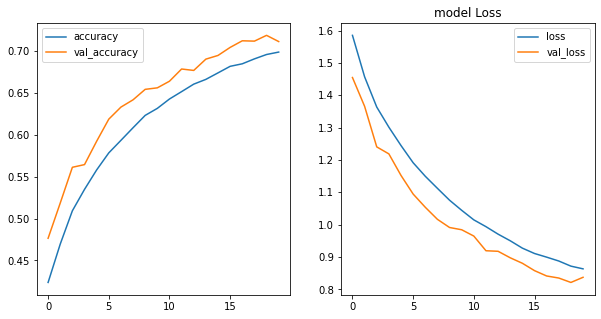

In [16]:
#Accuracy
fig, [ax,ax1] = plt.subplots(figsize=(10,5),nrows=1,ncols=2)
plt.title('model accuracy')
ax.plot(history.history['accuracy'], label = 'accuracy')
ax.plot(history.history['val_accuracy'], label = 'val_accuracy')
ax.legend()
plt.title('model Loss')
ax1.plot(history.history['loss'], label = 'loss')
ax1.plot(history.history['val_loss'], label = 'val_loss')
ax1.legend()

## Question 18:
Discuss with your group, then describe to your teacher, how the training history
differs from the convolutional model for digit recognition and why. (Question 18, 5
points)

The model is more complex, with 2 layers of convolutions (4 if we consider 2 conv x 2 sub conv). It by itself turn the model slower than before. Contribution to this we have now 3D array of image, so basicaly we come from 784 to 3072 (32x32x3) input size, it turns the model slower. 

## Question 19: 
Discuss with your group, then describe to your teacher, how the time taken for each
training epoch differs from the convolutional model for digit recognition. Give several
factors that may contribute to this difference (Question 19, 4 points)